# Testing Cases Outline

Here we asses how each texture feature differs across the bernoulli settings. Paragraph reports for each feature and plots; what do they highlight in any sudden patterns out of the randomness (look at certain cases of the samples), how are they affected by bernoulli settings.

## Image Generation
randomly generated 8x8 images using bernoulli iid for each pixel. 
take over 100 samples of images generated for each bernoulli setting and record the mean 

p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [2]:
from src.glcm_features.features import (compute_glcms, pre_feature_statistics, 
                                        compute_autocorrelation,      
                                        compute_cluster_prominence, 
                                        compute_cluster_shade,
                                        compute_dissimilarity,
                                        compute_entropy,
                                        compute_difference_entropy,
                                        compute_difference_variance,
                                        compute_inverse_difference,
                                        compute_sum_average,
                                        compute_sum_entropy,
                                        compute_sum_of_squares,
                                        compute_sum_variance,
                                        compute_information_measure_correlation_1,
                                        compute_information_measure_correlation_2
                                        )

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops

In [4]:
def compute_samples(bernoulli_settings, num_samples=100, size=(8, 8)):
    image_samples = {}
    sample_features = {}
    
    for p in bernoulli_settings:
        samples_list = []
        features_list = []

        for i in range(num_samples):
            image = (np.random.rand(*size) < p).astype(int)
            samples_list.append(image)
            
            glcm = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])['Pij']
            contrast = graycoprops(glcm, 'contrast')[0,0]
            energy = graycoprops(glcm, 'energy')[0,0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
            correlation = graycoprops(glcm, 'correlation')[0,0]

            glcm_stats = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])
            autocorrelation = compute_autocorrelation(glcm_stats)
            cluster_prominence = compute_cluster_prominence(glcm_stats)
            cluster_shade = compute_cluster_shade(glcm_stats)
            dissimilarity = compute_dissimilarity(glcm_stats)
            entropy = compute_entropy(glcm_stats)
            difference_entropy = compute_difference_entropy(glcm_stats)
            difference_variance = compute_difference_variance(glcm_stats)
            inverse_difference = compute_inverse_difference(glcm_stats)
            imc1 = compute_information_measure_correlation_1(glcm_stats)
            imc2 = compute_information_measure_correlation_2(glcm_stats)
            sum_average = compute_sum_average(glcm_stats)
            sum_entropy = compute_sum_entropy(glcm_stats)
            sum_of_squares = compute_sum_of_squares(glcm_stats)
            sum_variance = compute_sum_variance(glcm_stats)
            
            imc1 = np.array(imc1).item()
            imc2 = np.array(imc2).item()
    
            features = [contrast, energy, homogeneity, correlation, 
                        autocorrelation, cluster_prominence, cluster_shade, dissimilarity, entropy, 
                        difference_entropy, difference_variance, inverse_difference, imc1, imc2,
                        sum_average, sum_entropy, sum_of_squares, sum_variance]
            features_list.append(features)
            
        image_samples[p] = samples_list
        sample_features[p] = features_list
        
    return image_samples, sample_features

In [5]:
BERNOULLI_SETTINGS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples = 500)

# Data table

In [6]:
import pandas as pd

/Users/mussa/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
FEATURE_NAMES = [
    "contrast",
    "energy",
    "homogeneity",
    "correlation",
    "autocorrelation",
    "cluster_prominence",
    "cluster_shade",
    "dissimilarity",
    "entropy",
    "difference_entropy",
    "difference_variance",
    "inverse_difference",
    "imc1",
    "imc2",
    "sum_average",
    "sum_entropy",
    "sum_of_squares",
    "sum_variance"
]

rows = []
indices = []

for p, features_list in sample_features.items():
    for i, features in enumerate(features_list, start=1):
        rows.append(features)
        indices.append(f"{p}_{i}")


df = pd.DataFrame(rows, columns=FEATURE_NAMES, index=indices)

In [8]:
df.sample(10)

,contrast,energy,homogeneity,correlation,autocorrelation,cluster_prominence,cluster_shade,dissimilarity,entropy,difference_entropy,difference_variance,inverse_difference,imc1,imc2,sum_average,sum_entropy,sum_of_squares,sum_variance
0.7_19,0.395238,0.633208,0.802381,-0.096299,[[3.095238095238095]],[[-0.13505539358600577]],[[0.2668167569068443]],[[0.3952380952380953]],[[1.0864671683118954]],0.671034,0.239025,[[0.8023809523809524]],-0.008798,0.098998,3.528571,0.813227,[[0.173718820861678]],0.325374
0.6_221,0.409524,0.588360,0.795238,0.006936,[[2.9238095238095236]],[[-0.1760950221358388]],[[0.41769445447113107]],[[0.4095238095238095]],[[1.2046908526577016]],0.676685,0.241814,[[0.7952380952380953]],-0.000039,0.006929,3.419048,0.921274,[[0.20201814058956913]],0.414875
0.4_470,0.514286,0.501879,0.742857,-0.031853,[[2.157142857142857]],[[0.025749271137025936]],[[0.48213710953769257]],[[0.5142857142857142]],[[1.382428812087554]],0.692739,0.249796,[[0.7428571428571429]],-0.000733,0.031850,2.942857,1.026041,[[0.24888888888888888]],0.482449
0.9_188,0.300000,0.704794,0.850000,-0.022280,[[3.314285714285714]],[[-0.17580174927113698]],[[0.27028842149104537]],[[0.3]],[[0.9378390910177137]],0.610864,0.210000,[[0.8499999999999999]],-0.000529,0.022523,3.642857,0.730235,[[0.1420408163265306]],0.286735
0.7_194,0.461905,0.558545,0.769048,-0.050568,[[2.7904761904761903]],[[-0.12952553719900614]],[[0.4010703857960416]],[[0.46190476190476193]],[[1.2613718836407417]],0.690242,0.248549,[[0.769047619047619]],-0.002029,0.050796,3.347619,0.941425,[[0.2172562358276644]],0.417256
0.6_415,0.509524,0.510879,0.745238,-0.041727,[[2.466666666666667]],[[-0.06315819026023103]],[[0.4660149922100359]],[[0.5095238095238095]],[[1.3635280201634308]],0.692966,0.249909,[[0.7452380952380953]],-0.001277,0.041741,3.147619,1.010375,[[0.2448979591836735]],0.468685
0.4_91,0.485714,0.522379,0.757143,-0.014539,[[1.9428571428571428]],[[0.09534521110031338]],[[0.4683666743795024]],[[0.48571428571428577]],[[1.3404430296721779]],0.692739,0.249796,[[0.7571428571428572]],-0.000156,0.014545,2.790476,1.005267,[[0.23467120181405898]],0.470385
0.6_486,0.504762,0.536977,0.747619,-0.092540,[[2.661904761904762]],[[-0.0920133894827771]],[[0.39932099896648]],[[0.5047619047619047]],[[1.3042828595195426]],0.693102,0.249977,[[0.7476190476190476]],-0.006574,0.092931,3.276190,0.954768,[[0.23346938775510206]],0.418957
0.3_420,0.423810,0.598448,0.788095,-0.065691,[[1.6095238095238096]],[[0.14443364647446302]],[[0.3394525043577523]],[[0.4238095238095238]],[[1.1717805302008801]],0.681492,0.244195,[[0.788095238095238]],-0.003756,0.066459,2.547619,0.878045,[[0.19990929705215418]],0.371542
0.2_79,0.285714,0.728836,0.857143,-0.078046,[[1.3285714285714285]],[[0.13882215743440252]],[[0.1853541024573096]],[[0.2857142857142857]],[[0.8657041864461569]],0.598270,0.204082,[[0.857142857142857]],-0.007577,0.082488,2.314286,0.668298,[[0.12582766439909296]],0.244082


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0.1_1 to 0.9_500
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contrast             4500 non-null   float64
 1   energy               4500 non-null   float64
 2   homogeneity          4500 non-null   float64
 3   correlation          4500 non-null   float64
 4   autocorrelation      4500 non-null   object 
 5   cluster_prominence   4500 non-null   object 
 6   cluster_shade        4500 non-null   object 
 7   dissimilarity        4500 non-null   object 
 8   entropy              4500 non-null   object 
 9   difference_entropy   4500 non-null   float64
 10  difference_variance  4500 non-null   float64
 11  inverse_difference   4500 non-null   object 
 12  imc1                 4500 non-null   float64
 13  imc2                 4500 non-null   float64
 14  sum_average          4500 non-null   float64
 15  sum_entropy          4500 non-null  

## Autocorrelation

* The auto correlation give the sum of the products of expected vlaues.

This plot seems interesting; we might want to test this out on a greater amount of gray levels.

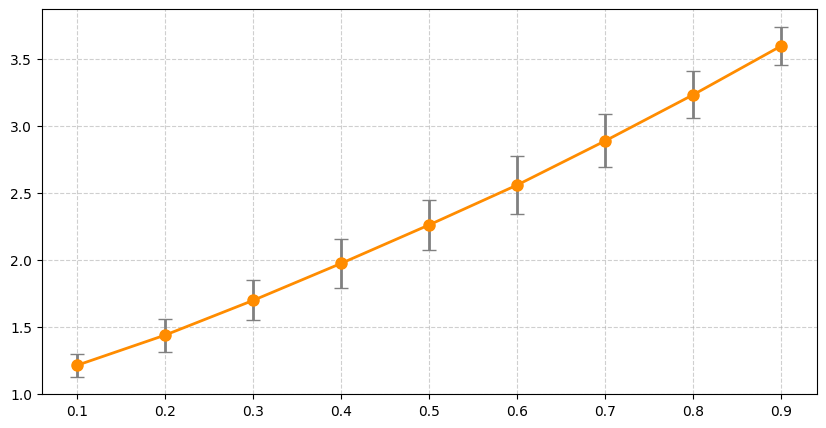

In [10]:
avg_autocorrelation = [np.mean([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_autocorrelation = [np.std([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_autocorrelation, yerr=std_autocorrelation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Cluster prominence

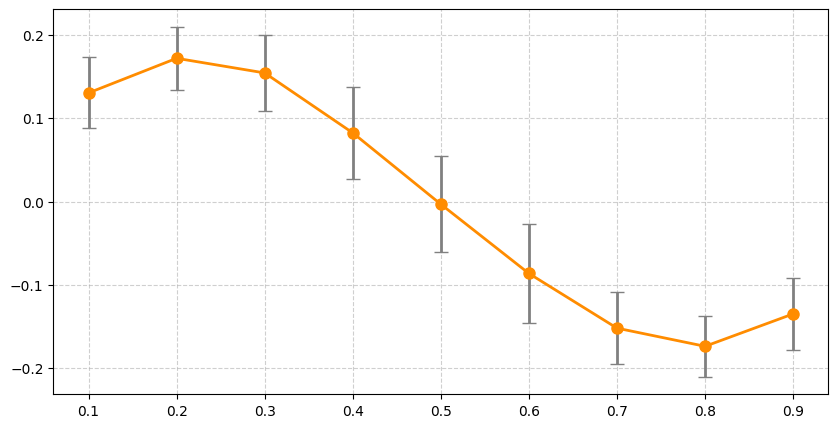

In [11]:
avg_clusterprom = [np.mean([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clusterprom = [np.std([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clusterprom, yerr=std_clusterprom, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Cluster shade

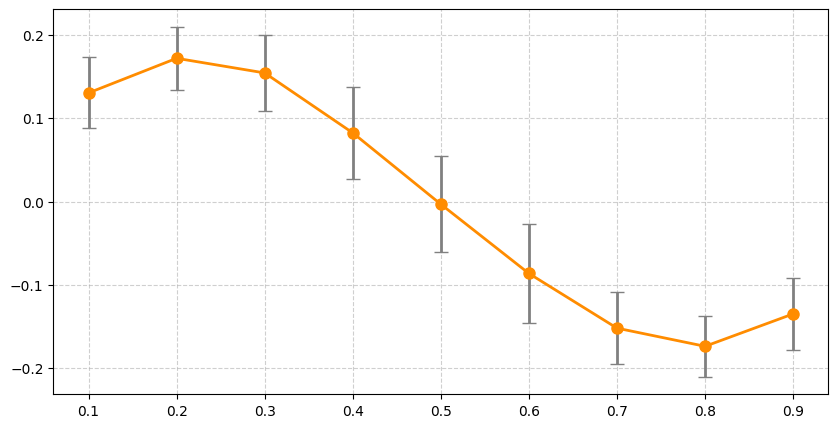

In [12]:
avg_clusterprom = [np.mean([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clusterprom = [np.std([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clusterprom, yerr=std_clusterprom, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Contrast

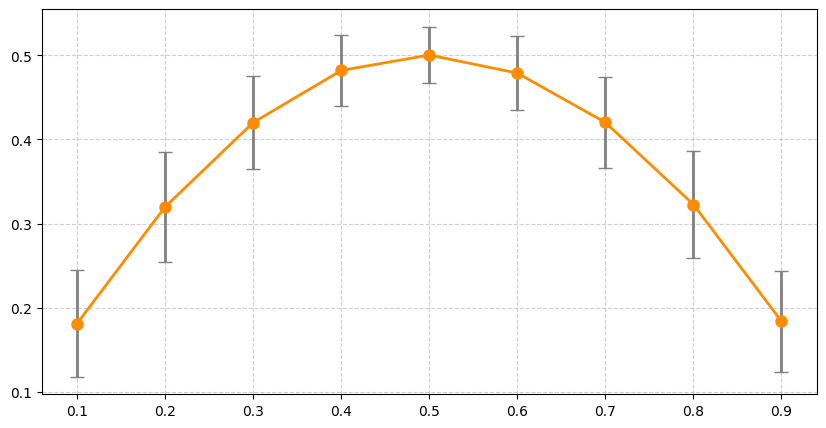

In [13]:
avg_contrast = [np.mean([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_contrast = [np.std([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
# plt.plot(BERNOULLI_SETTINGS, [sample_features[p][0][1] for p in BERNOULLI_SETTINGS], marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
# plt.plot(BERNOULLI_SETTINGS, avg_image_contrast, marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
plt.errorbar(BERNOULLI_SETTINGS, avg_contrast, yerr=std_contrast, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Correlation

Only noticable differance between the settings was: the 0.1 and 0.9 bernoulli setting were likely to have a higher variance, further examinations are needed. Nevertheless, this difference in mere varianvce of samples dosen't provide much insight unto the feature characteristics. Values range from -0.1 to 0.1, and average around -0.012 (all settings)

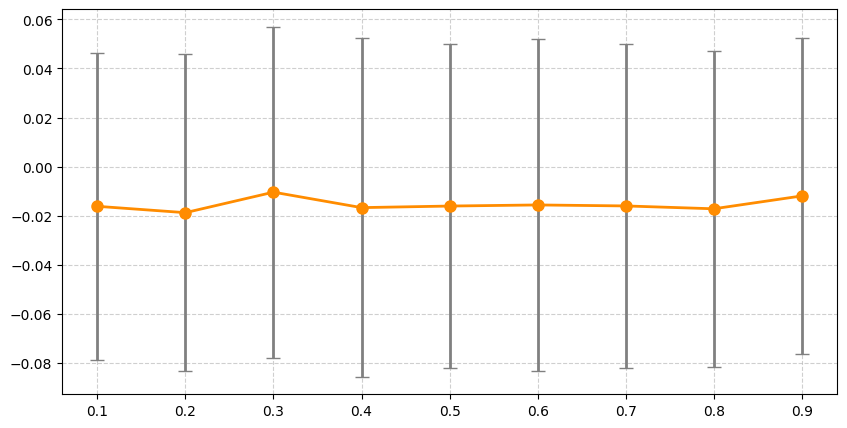

In [14]:
avg_correlation = [np.mean([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_correlation = [np.std([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_correlation, yerr=std_correlation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Difference entropy

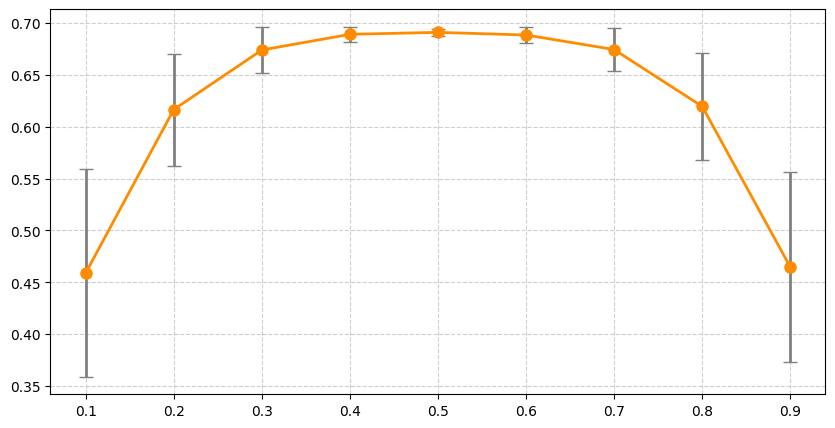

In [15]:
avg_difference_entropy = [np.mean([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_entropy = [np.std([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_entropy, yerr=std_difference_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Difference variance

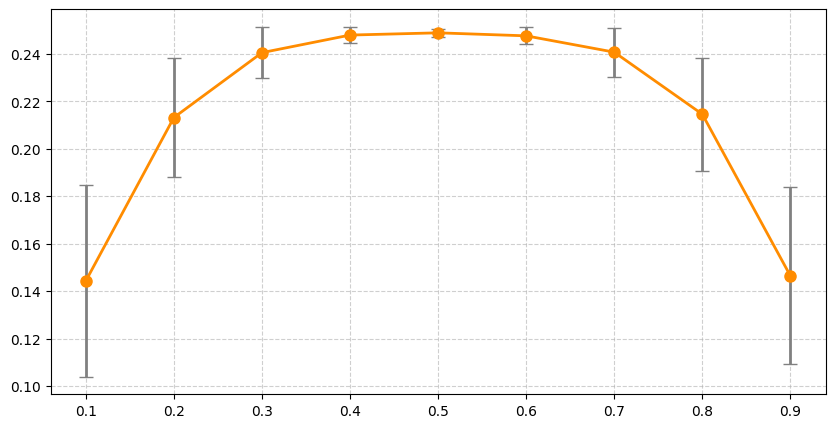

In [16]:
avg_difference_variance = [np.mean([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_variance = [np.std([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_variance, yerr=std_difference_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Dissimilarity

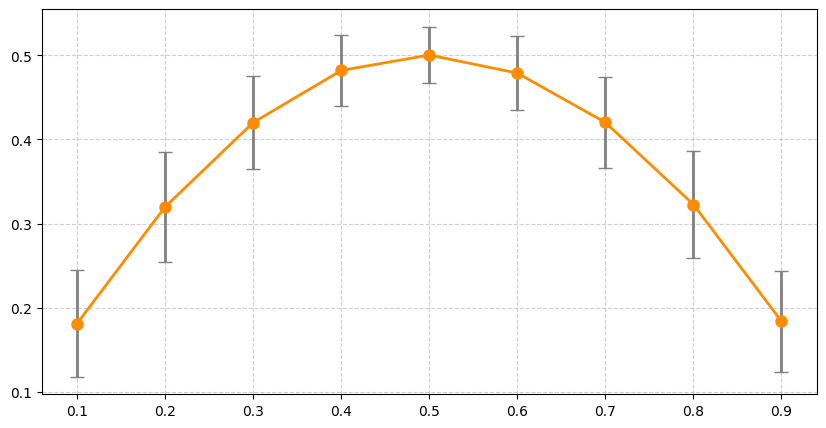

In [17]:
avg_dissimilarity = [np.mean([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_dissimilarity = [np.std([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_dissimilarity, yerr=std_dissimilarity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Energy

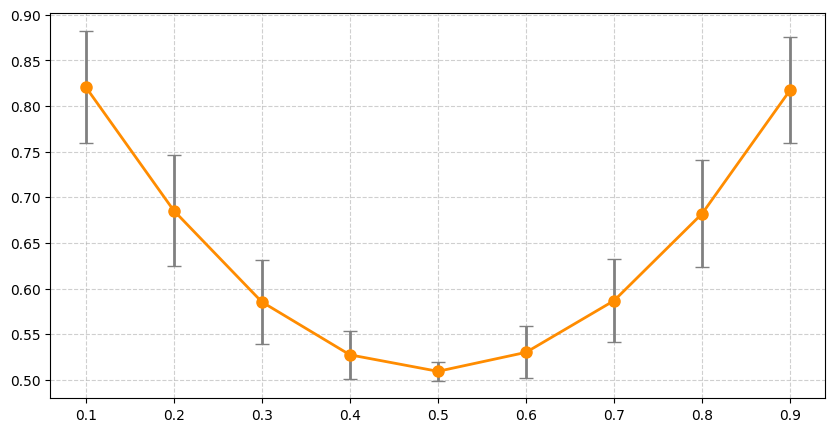

In [18]:
avg_energy = [np.mean([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_energy = [np.std([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_energy, yerr=std_energy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Entropy

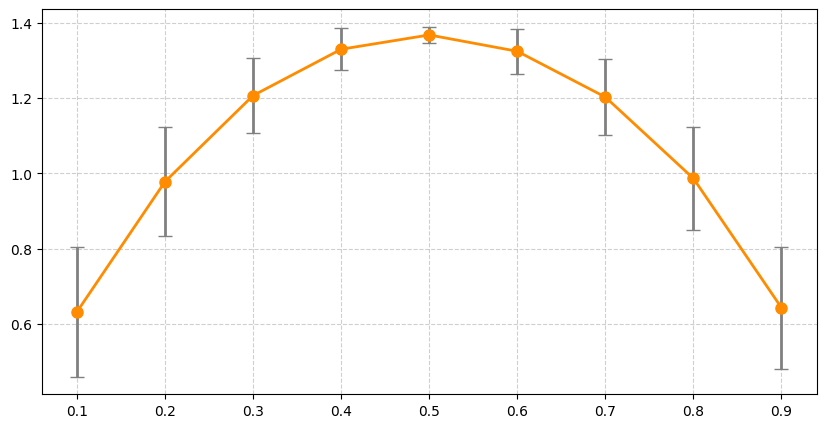

In [19]:
avg_entropy = [np.mean([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_entropy = [np.std([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_entropy, yerr=std_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Homogeneity

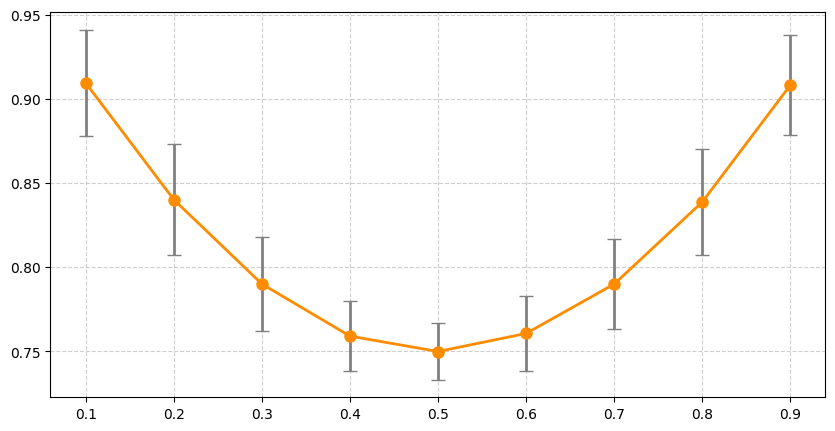

In [20]:
avg_homogeneity = [np.mean([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_homogeneity = [np.std([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_homogeneity, yerr=std_homogeneity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Information measure of correlation 1

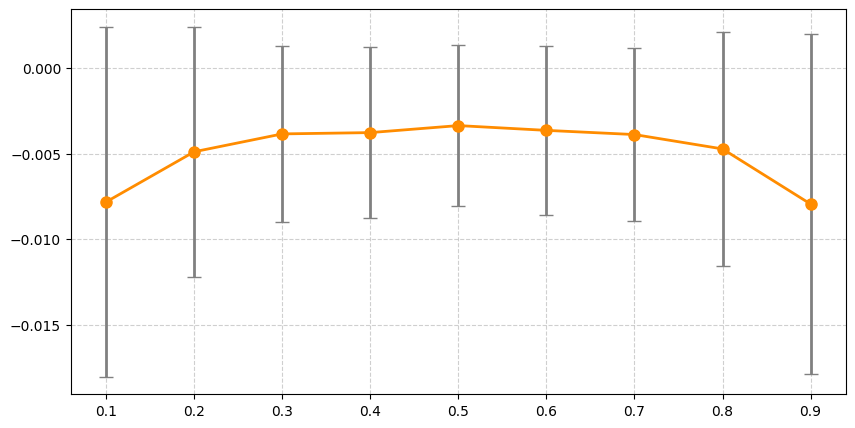

In [21]:
avg_imc1 = [np.mean([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc1 = [np.std([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc1, yerr=std_imc1, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Information measure of correlation 2

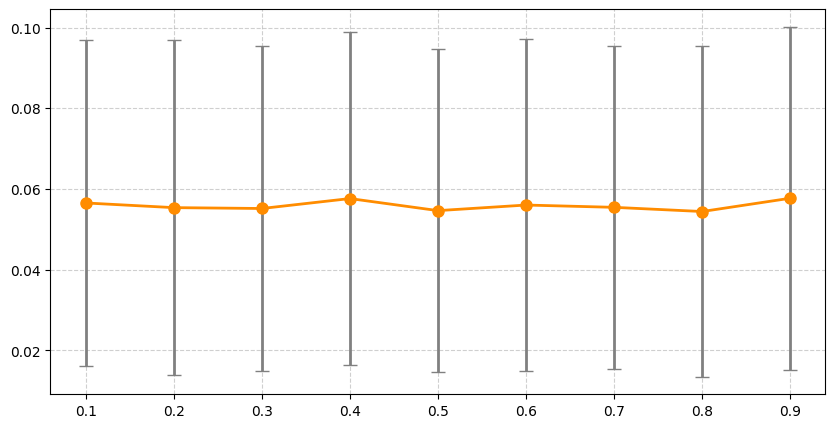

In [22]:
avg_imc2 = [np.mean([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc2 = [np.std([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc2, yerr=std_imc2, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Inverse difference

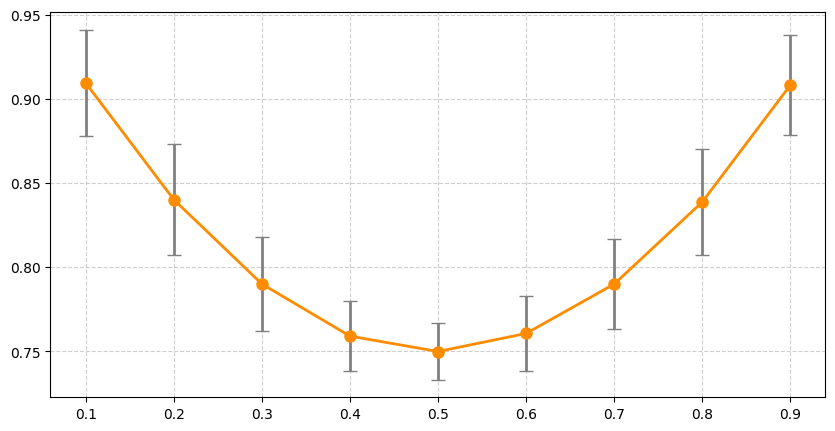

In [23]:
avg_inverse_difference = [np.mean([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_inverse_difference = [np.std([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_inverse_difference, yerr=std_inverse_difference, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Maximum probability

## Sum average

* This gives us the sum of the indices weighted by the k value

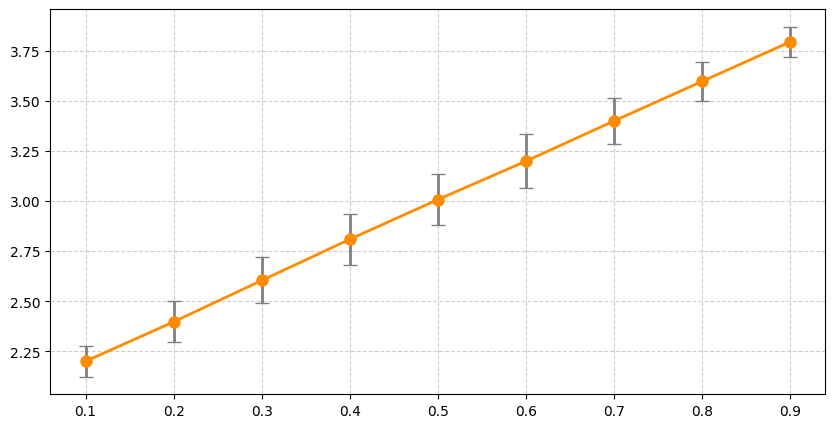

In [24]:
avg_sum_average = [np.mean([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_average = [np.std([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_average, yerr=std_sum_average, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum entropy

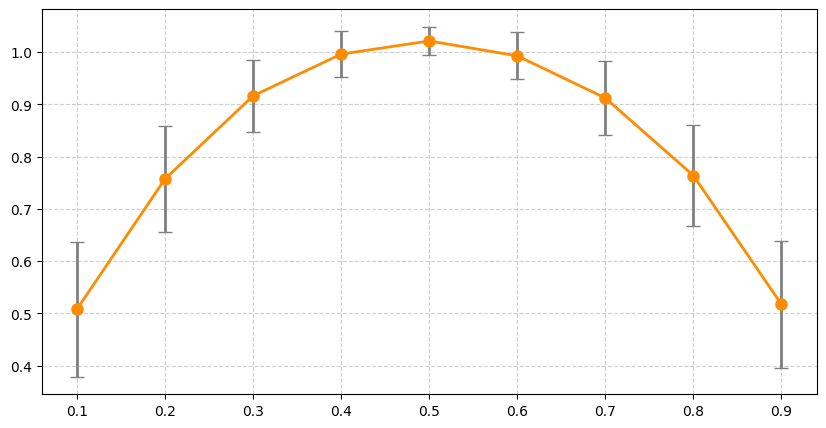

In [25]:
avg_sum_entropy = [np.mean([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_entropy = [np.std([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_entropy, yerr=std_sum_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum of squares

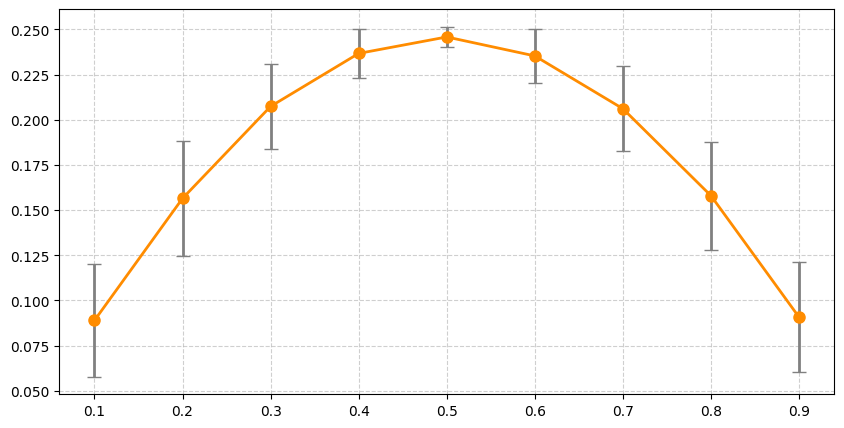

In [26]:
avg_sum_of_squares = [np.mean([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_of_squares = [np.std([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_of_squares, yerr=std_sum_of_squares, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum variance

Similar to the distribution of the contrast feature and dissimilarity feature. Maybe we can test to see if would produce a similar image when computed on a gray scale image.

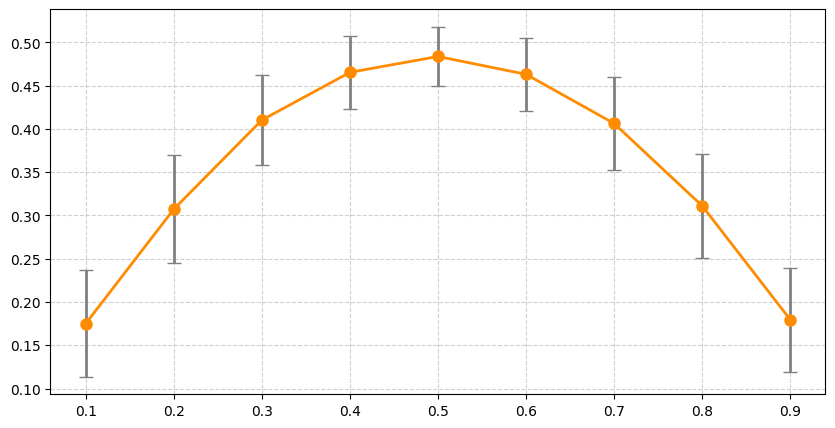

In [27]:
avg_sum_variance = [np.mean([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_variance = [np.std([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_variance, yerr=std_sum_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Maximal Correlation Coefficient

## Difference average 
From pyradiomics repository. 

https://github.com/AIM-Harvard/pyradiomics/blob/master/radiomics/glcm.py 

In [28]:
# r"""
# **8. Difference Average**

# .. math::
#     \textit{difference average} = \displaystyle\sum^{N_g-1}_{k=0}{kp_{x-y}(k)}

# Difference Average measures the relationship between occurrences of pairs
# with similar intensity values and occurrences of pairs with differing intensity
# values.
# """

## Inverse variance
From pyradiomics repository. 

https://github.com/AIM-Harvard/pyradiomics/blob/master/radiomics/glcm.py 

## Plot adjustments

All the plots are somewhat symmetric. This is because there are only 2 gray levels (0.1 for gray level of 0 is similar to 0.9 for gray level of 1). We can adjust these plots to have only up until 0.5 ; this will remove any redundancy.

Maybe plot multiple features on a single plot.